<a href="https://colab.research.google.com/github/RazerRaymond/Pricing-Simulations/blob/main/delta_hedging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.stats import norm
def BMS_d1(S, K, r, q, sigma, tau):
    ''' Computes d1 for the Black Merton Scholes formula '''
    d1 = 1.0*(np.log(1.0 * S/K) + (r - q + sigma**2/2) * tau) / (sigma * 
np.sqrt(tau))
    return d1
def BMS_d2(S, K, r, q, sigma, tau):
    ''' Computes d2 for the Black Merton Scholes formula '''
    d2 = 1.0*(np.log(1.0 * S/K) + (r - q - sigma**2/2) * tau) / (sigma * 
np.sqrt(tau))
    return d2
def BMS_price(type_option, S, K, r, q, sigma, T, t=0):
    ''' Computes the Black Merton Scholes price for a 'call' or 'put' option '''
    tau = T - t
    d1 = BMS_d1(S, K, r, q, sigma, tau)
    d2 = BMS_d2(S, K, r, q, sigma, tau)
    if type_option == 'call':
        price = S * np.exp(-q * tau) * norm.cdf(d1) - K * np.exp(-r * tau) * norm.cdf(d2)
    elif type_option == 'put':
        price = K * np.exp(-r * tau) * norm.cdf(-d2) - S * np.exp(-q * tau) * norm.cdf(-d1) 
    return price
def BMS_delta(type_option, S, K, r, q, sigma, T, t=0):
    ''' Computes the delta for a call or a put. '''
    tau = T - t
    d1 = BMS_d1(S, K, r, q, sigma, tau)
    if type_option == 'call':
        delta = np.exp(-q * tau) * norm.cdf(d1)
    elif type_option == 'put':
        delta = np.exp(-q * tau) * (norm.cdf(d1) - 1)
    return delta

Cost of delta hedging in Black-Merton-Scholes (BMS) Model (Call)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

# problem data
spot = 100
K = 110
r = 0.05
q = 0.02
sig = 0.22

maturity = 1

m = 365
dt = maturity/m

# ir and divr
r_d = r / m
q_d = q / m


In [ ]:
# Compute the true value of the call
C = BMS_price('call', spot, K, r, q, sig, maturity)
print('C = ' + str(C))

C = 5.954162330654235


In [ ]:
n_sim = 100
np.random.seed(4123456)
synthetic_C = np.zeros(n_sim)

st = time()


for j in range(n_sim):
    # reset for each path
    S = spot
    T = maturity
    delta_C_prev = 0.0
    cash_prev = C
    interest = 0
    for i in range(m):
        interest += cash_prev * r_d
        delta_C = BMS_delta('call', S, K, r, q, sig, T)
        share_purchased = delta_C - (delta_C_prev *(1 + q_d))
        cash = cash_prev -  share_purchased * S
        synthetic_C[j] += (share_purchased)*S
        # Note - net position is always delta_c

        # Adjust for ir

        cash_prev = cash
        delta_C_prev = delta_C
        
        # Calculate GBM
        z = np.random.randn()
        S = S * np.exp((r - q - sig*sig/2)*dt + sig*np.sqrt(dt)*z)
        T = T - dt

    interest -= C * r_d
    synthetic_C[j] += (-delta_C*S + np.maximum(S-K,0) - interest)

et = time()
print('Elapsed time is %s seconds.' % str(et - st))

Elapsed time is 4.392863988876343 seconds.


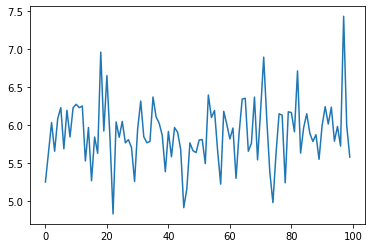

In [ ]:
plt.plot(synthetic_C)
plt.show()

In [ ]:
print('C = ' + str(C))
print('mean_synthetic_C = ' + str(np.mean(synthetic_C)))
print('std_synthetic_C = ' + str(np.std(synthetic_C, ddof=1)))

C = 5.954162330654235
mean_synthetic_C = 5.893645369728744
std_synthetic_C = 0.414430271090255


Cost of delta hedging in BMS Model (Put)

In [ ]:
# Compute the true value of the put
P = BMS_price('put', spot, K, r, q, sig, maturity)
print('P = ' + str(P))

P = 12.569531695057258


In [ ]:
n_sim = 100
np.random.seed(4123456)
synthetic_P = np.zeros(n_sim)

st = time()

for j in range(n_sim):
    # reset for each path
    S = spot
    T = maturity
    delta_P_prev = 0.0
    cash_prev = P
    interest = 0
    for i in range(m):
        interest += cash_prev * r_d
        delta_P = BMS_delta('put', S, K, r, q, sig, T)
        share_purchased = delta_P - (delta_P_prev *(1 + q_d))
        cash = cash_prev -  share_purchased * S
        synthetic_P[j] += (share_purchased)*S
        # Note - net position is always delta_c

        # Adjust for ir

        cash_prev = cash
        delta_P_prev = delta_P
        
        # Calculate GBM
        z = np.random.randn()
        S = S * np.exp((r - q - sig*sig/2)*dt + sig*np.sqrt(dt)*z)
        T = T - dt

    interest -= P * r_d
    synthetic_P[j] += (-delta_P*S + np.maximum(S-K,0) + interest)

et = time()
print('Elapsed time is %s seconds.' % str(et - st))

Elapsed time is 5.171753406524658 seconds.


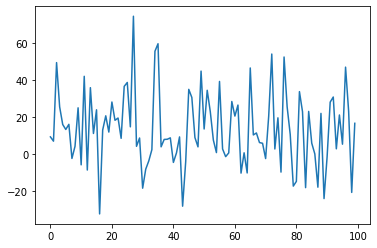

In [ ]:
plt.plot(synthetic_P)
plt.show()

In [ ]:
print('P = ' + str(P))
print('mean_synthetic_P = ' + str(np.mean(synthetic_P)))
print('std_synthetic_P = ' + str(np.std(synthetic_P, ddof=1)))

P = 12.569531695057258
mean_synthetic_P = 13.203753767309115
std_synthetic_P = 20.28471780559202
